# Introduction

In this benchmarking challenge, you will be tasked to create an [AutoRA theorist](https://autoresearch.github.io/autora/theorist/) to discover equations that best describe a given data set.

You can use this notebook to benchmark your theorist based on 3 different datasets from 3 different cogntive models, respectively.








## Benchmarking Challenge Rules

- All contributing teams must publish a pip package of their theorist. We recommend using a pre-release.
- The package name must be ``autora-theorist-yourtheorist``
- The **theorist must have a fit and predict function**, and it must be **compatible with the synthetic models** in this notebook. We will call the following code to evaluate the theorists, except that we won't be using the Weber-Fechner-Law:

```python
pip install --pre <autora-theorist-yourtheorist>

from autora.theorist.yourtheorist import yourtheorist
from autora.experiment_runner.synthetic.psychophysics.weber_fechner_law import weber_fechner_law # this will be a secret ground truth model

experiment_runner = weber_fechner_law()
theorist = yourtheorist()

# generate all conditions
conditions = experiment_runner.domain()

# generate all corresponding observations
experiment_data = experiment_runner.run(conditions, added_noise=0.01)

# get the name of the independent and independent variables
ivs = [iv.name for iv in experiment_runner.variables.independent_variables]
dvs = [dv.name for dv in experiment_runner.variables.dependent_variables]

# extract the dependent variable (observations) from experiment data
conditions = experiment_data[ivs]
observations = experiment_data[dvs]

# split into train and test datasets
conditions_train, conditions_test, observations_train, observations_test = train_test_split(conditions, observations)

# fit theorist
theorist.fit(conditions_train, observations_train)

# compute prediction for validation set
predictions = theorist.predict(conditions_test)

# evaluate theorist performance
error = (predictions - observations_test).pow(2)
error = error.mean()

theorist.print_eqn()


```

- Theorist also **must have a function ``print_eqn`` returning the discovered equation as a string.**
- The discovered equation **may not include more than 40 symbols/function elements**.
- Teams will be ranked based on the fit to two ground-truth models. Observations will be sampled across the entire domain of the ground-truth model. The rank will be accumulated across all benchmarking challenges. The team with the best accumulated rank will win a prize at the end of the workshop.
- The teams must provide a **brief presentation** (less than 5 minutes) of their theorist just before the final evaluation. You may use [this template for your slides](https://docs.google.com/presentation/d/1esmYO09ehiGOkzBsBAEf_wCfx2JrlmWwP7dyfpu0dEM/edit?usp=sharing).

*Hint: You may not use a search space including more than the following functions and operators.*
  - +
  - -
  - *
  - /
  - e^x
  - ln x
  - x^c
  - c (constants may appear)

## Grading

- Due date: **August 30**
- Submission: Through ``Stud.IP -> Tasks -> Equation Discovery Challenge``

The grading is independent of the outcome of the benchmarking challenge.

The following points will be provided:
- A demonstration of the theorist in the ``doc/Basic Usage.ipynb``:
  -  2 points: Demonstrating how to use the theorist for fitting
  -  2 points: Demonstrating how to use the theorist for predicting
  -  2 points: Demonstrating how to obtain the equation fit by the theorist
  -  4 points: Demonstrating that the theorist can recover at least two ground truth models. (*Hint: You could use the benchmarking part of the notebook below as a starting point*).
- The documentation of the theorist in ``doc/index.md`` must speak to the following information:
  - 2 points: Search Algorithm: a description of the search algorithm, and how the goodness of the equation was determined?
  - 2 points: Search Space: which search space was used and how was the search otherwise constrained?
- 2 points: The code contains at least two useful unit tests for the theorist method (either doc tests or separate tests)
- 1 point: the contributors used issues to track bugs and work on features.
- 1 point: the contributors used (helpful) code reviews for their PRs.
- 1 point: Unit tests are automatically executed when a pull request is created.
- 1 point: The documentation is hosted automatically.

Finally, teams must outline the contributions of each team member in their submission on ``Stud.IP -> Tasks -> Equation Discovery Challenge``.

In total, you can obtain 20 points.

## Additional Resources

- You can learn more about how to write AutoRA theorists in the [Contributor Guide](https://autoresearch.github.io/autora/contribute/modules/theorist/).

- You can learn more about how to use AutoRA in the [User Tutorial](https://autoresearch.github.io/autora/tutorials/).

- If you want to learn more about AutoRA states, you can check out [this tutorial on using AutoRA states](https://colab.research.google.com/drive/1yK1OBRpPZM1NgTMV9arHlE5j8xXjsGqq?usp=sharing).

# Code for Benchmarking your Theorist

## Installation

*Hint: You may want to add ``autora`` as a development dependency in your ``pyproject.tml``.*

In [ ]:
#%%capture
#pip install autora
#!pip install autora[all-theorists]
#HEY guys this is my test

In [1]:
# autora state
from autora.state import StandardState, on_state, Delta

# experiment_runner
from autora.experiment_runner.synthetic.psychophysics.weber_fechner_law import weber_fechner_law
from autora.experiment_runner.synthetic.psychophysics.stevens_power_law import stevens_power_law
from autora.experiment_runner.synthetic.economics.expected_value_theory import expected_value_theory

# experimentalist
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_pool, random_sample

# data handling
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:
a = np.arange(10).reshape(5, 2)
df = pd.DataFrame(a, columns=[f'x_{n}' for n in range(a.shape[1])])
print(df)   

   x_0  x_1
0    0    1
1    2    3
2    4    5
3    6    7
4    8    9


## Benchmarking Function

We will use the following function for benchmarking our model for any given experiment runner.

In [3]:
def benchmark(experiment_runner, theorist):

  # generate all conditions
  conditions = experiment_runner.domain()

  # generate all corresponding observations
  experiment_data = experiment_runner.run(conditions, added_noise=0.01)

  # get the name of the independent and independent variables
  ivs = [iv.name for iv in experiment_runner.variables.independent_variables]
  dvs = [dv.name for dv in experiment_runner.variables.dependent_variables]

  # extract the dependent variable (observations) from experiment data
  conditions = experiment_data[ivs]
  observations = experiment_data[dvs]

  # split into train and test datasets
  conditions_train, conditions_test, observations_train, observations_test = train_test_split(conditions, observations)

  print("#### EXPERIMENT CONDITIONS (X):")
  print(type(conditions))
  print(conditions)
  print("#### EXPERIMENT OBSERVATIONS (Y):")
  print(observations)

  # fit theorist
  theorist.fit(conditions_train, observations_train)

  # compute prediction for validation set
  predictions = theorist.predict(conditions_test)

  # evaluate theorist performance
  error = (predictions - observations_test).pow(2)
  error = error.mean()

  print("#### IDENTIFIED EQUATION:")
  print(theorist.print_eqn())

  print("#### VALIDATION SET MSE:")
  print(error)

  experiment_runner.plotter(model=theorist)


## Dummy Theorist

For demonstration purposes, we will use this dummy theorist below. However, to effectively benchmark *your* equation discovery method, you may instead import your theorist from ``.src.theorist`` and use it instead.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


class PolynomialRegressor:
    """
    This theorist fits a polynomial function to the data.
    """

    def __init__(self, degree: int = 3):
      self.poly = PolynomialFeatures(degree=degree, include_bias=False)
      self.model = LinearRegression()

    def fit(self, x, y):
      features = self.poly.fit_transform(x, y)
      self.model.fit(features, y)
      return self

    def predict(self, x):
      features = self.poly.fit_transform(x)
      return self.model.predict(features)

    def print_eqn(self):
        # Extract the coefficients and intercept
        coeffs = self.model.coef_
        intercept = self.model.intercept_

        # Handle multi-output case by iterating over each output's coefficients and intercept
        if coeffs.ndim > 1:
            for idx in range(coeffs.shape[0]):
                equation = f"y{idx+1} = {intercept[idx]:.3f}"
                feature_names = self.poly.get_feature_names_out()
                for coef, feature in zip(coeffs[idx], feature_names):
                    equation += f" + ({coef:.3f}) * {feature}"
                print(equation)
        else:
            equation = f"y = {intercept:.3f}"
            feature_names = self.poly.get_feature_names_out()
            for coef, feature in zip(coeffs, feature_names):
                equation += f" + ({coef:.3f}) * {feature}"
            print(equation)

dummy_theorist = PolynomialRegressor()

**Note**: Once you implemented your theorist in ``src/autora/theorist/autora_theorist_yourtheorist`` then you can add it as a theorist instead:

In [5]:
# from autora.theorist.autora_theorist_polynomial import ExampleRegressor

# my_theorist = ExampleRegressor()

#my_theorist = dummy_theorist # remove this once you implemented your own theorist

#from autora.theorist.nuts import SimpleLinearTheorist
#my_theorist = SimpleLinearTheorist()

from autora.theorist.nuts import NutsTheorists
my_theorist = NutsTheorists()

## Ground-Truth Models for Benchmarking



### Steven's Power Law

Steven's power law describes the relationship between a stimulus's intensity $S$ ($range: [0.01, 5.00]$) and its perceived magnitude $y$. According to this law, humans are less sensitive to changes in high-intensity stimuli compared to low-intensity ones, leading to a power-law relationship between stimulus intensity and perceived magnitude:


$\text{perceived intensity} = {S}^\alpha$

where $\alpha = 0.80$, resulting in diminishing effects of increases in stimulus intensity.

In [6]:
import random   
def tournament(population_with_scores, k=5):
    """
    Selects the top-k individuals from the population using tournament selection.

    Args:
        population_with_scores (list): List of tuples (tree, mse_score)
        k (int): Number of top individuals to return

    Returns:
        list: List of top-k (tree, mse_score) tuples
    """
    # 1. Randomly select individuals for the tournament
    tournament_entrants = random.sample(population_with_scores, min(len(population_with_scores), 2 * k))

    # 2. Sort by MSE (ascending = better)
    sorted_entrants = sorted(tournament_entrants, key=lambda item: item[1])

    # 3. Return top-k (tree, mse_score) pairs
    return sorted_entrants[:k]

In [7]:
tournament([('x1',3), ('x2',4), ('x3',5), ('x4',6), ('x5',7), ('x6',8), ('x7',9), ('x8',10)], k=5)


[('x1', 3), ('x2', 4), ('x3', 5), ('x4', 6), ('x5', 7)]

#### EXPERIMENT CONDITIONS (X):
<class 'pandas.core.frame.DataFrame'>
           S
0   0.010000
1   0.060404
2   0.110808
3   0.161212
4   0.211616
..       ...
95  4.798384
96  4.848788
97  4.899192
98  4.949596
99  5.000000

[100 rows x 1 columns]
#### EXPERIMENT OBSERVATIONS (Y):
    perceived_intensity
0              0.008782
1              0.133962
2              0.175655
3              0.242844
4              0.283236
..                  ...
95             3.495338
96             3.519009
97             3.547943
98             3.615166
99             3.621488

[100 rows x 1 columns]
Gen 1: New best fitness (MSE) = 0.395219


<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
/workspace


Evolution finished.
Best equation found: S
Best fitness (MSE): 0.395219
#### IDENTIFIED EQUATION:
Best equation: S
S
#### VALIDATION SET MSE:
perceived_intensity    0.607659
dtype: float64


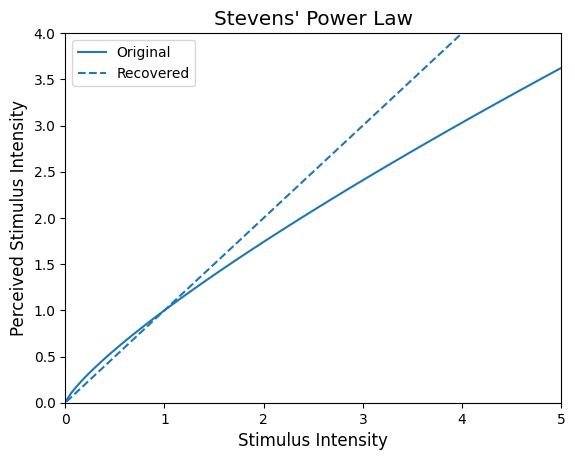

In [8]:
# run benchmark
benchmark(experiment_runner = stevens_power_law(), theorist = my_theorist)

In [9]:
my_theorist.print_eqn()
print(my_theorist.initial_population)
print(my_theorist.generate_next_generation(my_theorist.initial_population, pop_size=10))

Best equation: (log((c + S)) + log((S + c)))


AttributeError: 'NutsTheorists' object has no attribute 'initial_population'

### Weber-Fechner-Law

The Weber-Fechner law quantifies the minimum change in a stimulus required to be noticeable. Similar to Steven's power law, the greater the intensity of a stimulus, the larger the change needed to be perceivable. This relationship is hypothesized to be proportional to the logarithm of the ratio between the two stimuli:

$\text{perceived intensity} = \log\left(\dfrac{S_1}{S_2}\right)$


where $S_1$ ($range: [0.01, 5.00]$) is the intensity of a physical stimulus (e.g., the luminosity of a lamp), $S_2$ ($range: [0.01, 5.00]$ ) is a reference stimulus (e.g., the luminosity of a background light), and $y$ is the perceived stimulus intensity (e.g. the perception of the lamp's luminosity).

#### EXPERIMENT CONDITIONS (X):
<class 'pandas.core.frame.DataFrame'>
            S1        S2
0     0.010000  0.010000
1     0.010000  0.060404
2     0.010000  0.110808
3     0.010000  0.161212
4     0.010000  0.211616
...        ...       ...
5045  4.899192  4.949596
5046  4.899192  5.000000
5047  4.949596  4.949596
5048  4.949596  5.000000
5049  5.000000  5.000000

[5050 rows x 2 columns]
#### EXPERIMENT OBSERVATIONS (Y):
      difference_detected
0                0.007818
1                1.794325
2                2.405822
3                2.786715
4                3.068542
...                   ...
5045             0.000577
5046             0.023646
5047             0.006294
5048             0.017087
5049            -0.007565

[5050 rows x 1 columns]


<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in exp
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in exp
<string>:1: RuntimeWarning: divide by zero encountered in log


Gen 1: New best fitness (MSE) = 0.848234


<string>:1: RuntimeWarning: divide by zero encountered in scalar divide


Gen 2: New best fitness (MSE) = 0.592692


<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide


Gen 3: New best fitness (MSE) = 0.453000


<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: overflow encountered in exp
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar divide
<string>:1: RuntimeWarning: overflow encountered in scalar power


Gen 9: New best fitness (MSE) = 0.423378


<string>:1: RuntimeWarning: overflow encountered in exp
<string>:1: RuntimeWarning: overflow encountered in exp
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in exp
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid v

Gen 16: New best fitness (MSE) = 0.421509


<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
/workspaces/autora-theorist-nuts/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<string>:1: RuntimeWarning: overflow encountered in scalar power


Gen 18: New best fitness (MSE) = 0.257634


<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
/workspaces/autora-theorist-nuts/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:584: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar divide
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: Runtim


Evolution finished.
Best equation found: (S2 / (exp(c) ^ S1))
Best fitness (MSE): 0.257634
#### IDENTIFIED EQUATION:
Best equation: (S2 / (exp(c) ^ S1))
(S2 / (exp(c) ^ S1))
#### VALIDATION SET MSE:
difference_detected    0.227494
dtype: float64


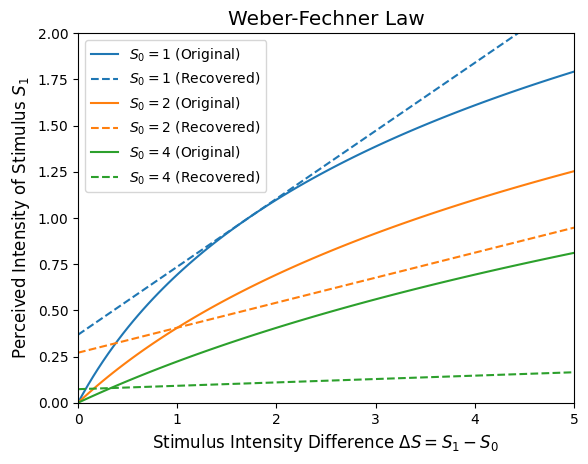

In [9]:
# run benchmark
benchmark(experiment_runner = weber_fechner_law(), theorist = my_theorist)

### Expected Utility Model with Two Choice Options

The expected utility model evaluates decision-making under uncertainty, quantifying the expected value of different choices based on their potential outcomes and associated probabilities. The model assumes that individuals aim to maximize their expected utility when faced with two options. Each option has a specific value and probability, influenced by a certain level of noise.

For two choice options, the expected value of each option is calculated as follows:

$$
E_A = V_A \times P_A
$$

$$
E_B = V_B \times P_B
$$

where:
- $V_A$ and $V_B$ represent the values of options A and B respectively.
- $P_A$ and $P_B$ represent the probabilities associated with these options.

The probability of choosing option A $P_{\text{choose}_A}$ is then determined using the softmax function, which considers the expected values of both options and a choice temperature parameter that influences the sensitivity to differences in expected values:

$$
P_{\text{choose}_A} = \frac{\exp(E_A / \beta)}{\exp(E_A / \beta) + \exp(E_B / \beta)}
$$

In this model:
- $\beta$ controls the degree of randomness in the choice, with higher values leading to more exploration and lower values leading to more deterministic choices based on the expected values.
- The softmax function ensures that the probabilities sum to 1, providing a normalized measure of the likelihood of choosing each option.

This model captures the influence of value, probability, and noise on decision-making, reflecting the complexity and variability of human choices under uncertainty.



#### EXPERIMENT CONDITIONS (X):
<class 'pandas.core.frame.DataFrame'>
        V_A       P_A       V_B       P_B
0 -1.000000 -0.777778 -0.555556 -0.333333
1 -0.111111  0.111111  0.333333  0.555556
2  0.777778  1.000000  0.000000  0.111111
3  0.222222  0.333333  0.444444  0.555556
4  0.666667  0.777778  0.888889  1.000000
5 -1.000000 -0.777778 -0.555556 -0.333333
6 -0.111111  0.111111  0.333333  0.555556
7  0.777778  1.000000  0.000000  0.111111
8  0.222222  0.333333  0.444444  0.555556
9  0.666667  0.777778  0.888889  1.000000
#### EXPERIMENT OBSERVATIONS (Y):
   choose_A
0  0.943632
1  0.299228
2  0.983861
3  0.246620
4  0.117343
5  0.948949
6  0.256616
7  0.984671
8  0.292077
9  0.147500
Gen 1: New best fitness (MSE) = 0.018912
Gen 2: New best fitness (MSE) = 0.018084
Gen 4: New best fitness (MSE) = 0.013192
Gen 5: New best fitness (MSE) = 0.007950


<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: i

Gen 8: New best fitness (MSE) = 0.005655
Gen 16: New best fitness (MSE) = 0.005466
Gen 24: New best fitness (MSE) = 0.001881
Gen 25: New best fitness (MSE) = 0.000761


<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero


Evolution finished.
Best equation found: ((P_A ^ V_B) / (exp(V_B) * exp(V_B)))
Best fitness (MSE): 0.000761
#### IDENTIFIED EQUATION:
Best equation: ((P_A ^ V_B) / (exp(V_B) * exp(V_B)))
((P_A ^ V_B) / (exp(V_B) * exp(V_B)))
#### VALIDATION SET MSE:
choose_A    0.000096
dtype: float64


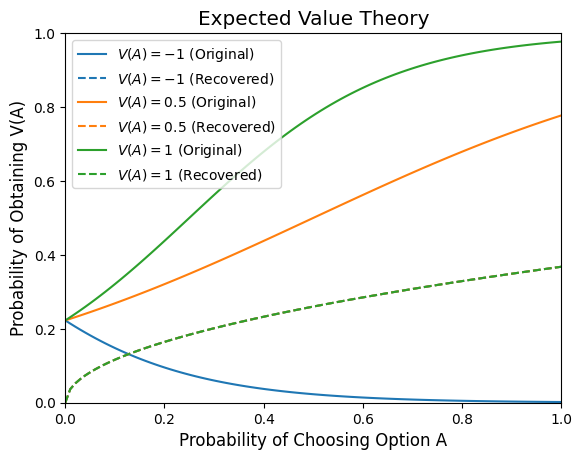

In [10]:
# run benchmark
benchmark(experiment_runner = expected_value_theory(), theorist = my_theorist)